In [2]:
from ocv_labeling import *
from preprocessing import *
from Separate_DF import *

/home/asher/anaconda3/envs/tsformer/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 데이터 불러오기

In [3]:
data_path = '/data2/ess/data/incell/panli/temp/bank/220301-220331_bank.parquet'
if 'panli' in data_path:
    site = 'panli'
elif 'sionyu' in data_path:
    site = 'sionyu'
else:
    raise Exception('data_path를 확인하여 주십시오.')

    
OCV_Labeled_DF = OCV_label(data_path=data_path,site=site, save_data_dir=None, save_fig_dir=None, monitor=True)
ALL_Labeled_DF = R_i_label(OCV_Labeled_DF)

# Separte with BANK_ID
# We need some trim operation to seperate BANK_ID later
ALL_Labeled_DF1 = ALL_Labeled_DF[ALL_Labeled_DF['BANK_ID']==1]
ALL_Labeled_DF2 = ALL_Labeled_DF[ALL_Labeled_DF['BANK_ID']==2]
Separated_DF1,dates1 = Separate_DF(ALL_Labeled_DF1)
Separated_DF2,dates2 = Separate_DF(ALL_Labeled_DF2)

dates1.sort()
dates2.sort()

2203_bank OCV labeling starts
BANK ID : 1
4.051666666666667 to 3.3358333333333334
4.042916666666667 to 3.3
4.050416666666667 to 3.302916666666667
4.0475 to 3.3020833333333335
4.029166666666667 to 3.30125
4.050833333333333 to 3.3025
4.033333333333333 to 3.3020833333333335
4.050833333333333 to 3.3020833333333335
4.05 to 3.305
4.041666666666667 to 3.30375
4.04875 to 3.30125
4.05 to 3.299583333333333
BANK ID : 2
4.044583333333334 to 3.3041666666666667
4.038749999999999 to 3.3
4.050416666666667 to 3.3016666666666667
4.03625 to 3.3016666666666667
4.03125 to 3.3016666666666667
4.050833333333333 to 3.30125
4.047916666666667 to 3.3041666666666667
4.0408333333333335 to 3.30375
4.050833333333333 to 3.3408333333333333
4.05 to 3.3375


## SOC, 전류, 전압 추출

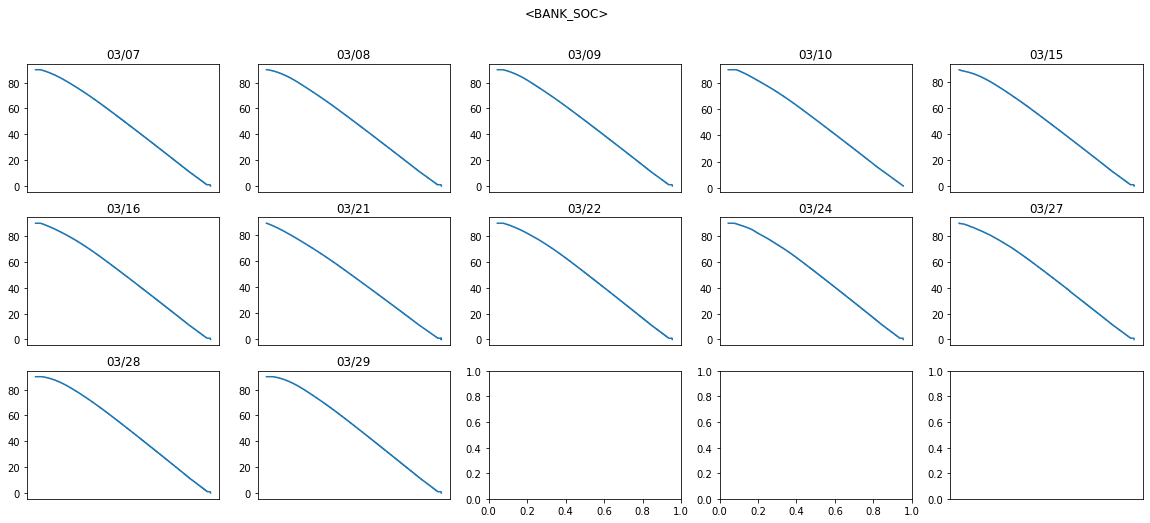

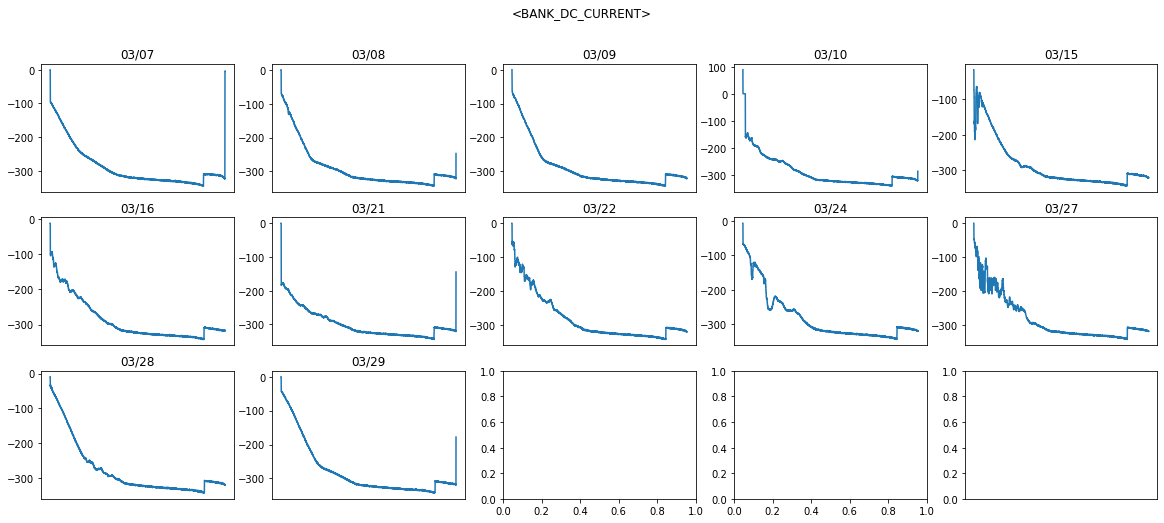

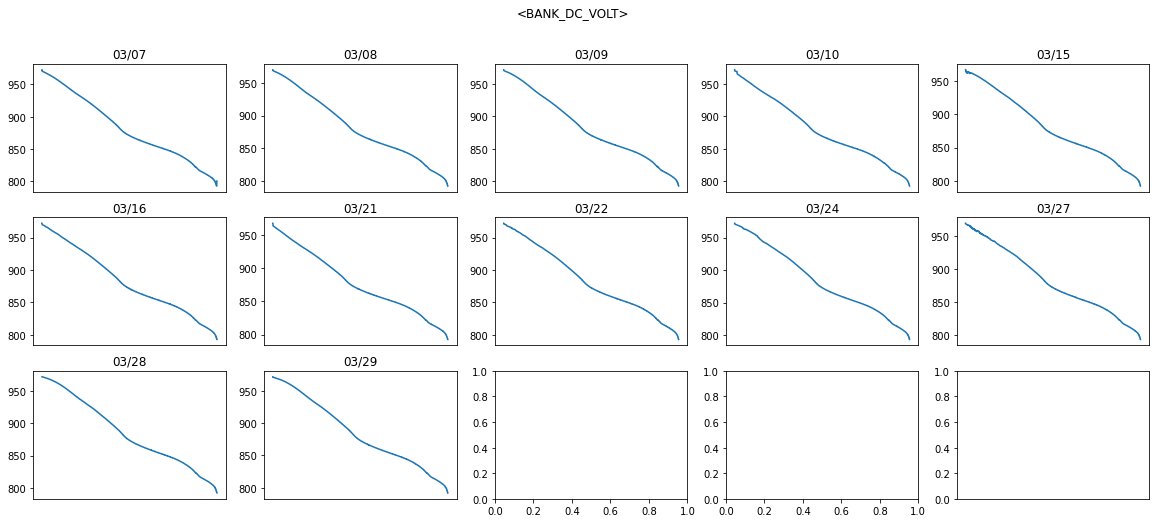

In [4]:
#concerns = Separated_DF1[dates1[0]].columns
concerns = [ 'BANK_SOC', 'BANK_DC_CURRENT', 'BANK_DC_VOLT']

for concern in concerns:
    
    #define subplots
    row , col = 3 , 5   # row, column
    fig, ax = plt.subplots(row, col, figsize=(20,8))
    plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
    #fig.tight_layout()
    

    #create subplots
    for i in range(row):
        for j in range(col):
            try:
                #plt.xticks(fontsize=16)
                #plt.yticks(fontsize=16)
                ax[i,j].plot( Separated_DF1[dates1[i*col + j]].loc[:,concern] )
                ax[i,j].set_title( dates1[i*col + j][:2] + '/' + dates1[i*col + j][2:] )
                ax[i,j].axes.xaxis.set_visible(False) #x축만 없애기
                
                #if concern == 'BANK_DC_VOLT':
                
                if concern == 'Internal_Resistance' :
                    ax[i,j].set_ylim(0,0.06)

            except:
                continue
         
    plt.suptitle('<'+concern+'>')
    plt.show()

## OCV 라벨링

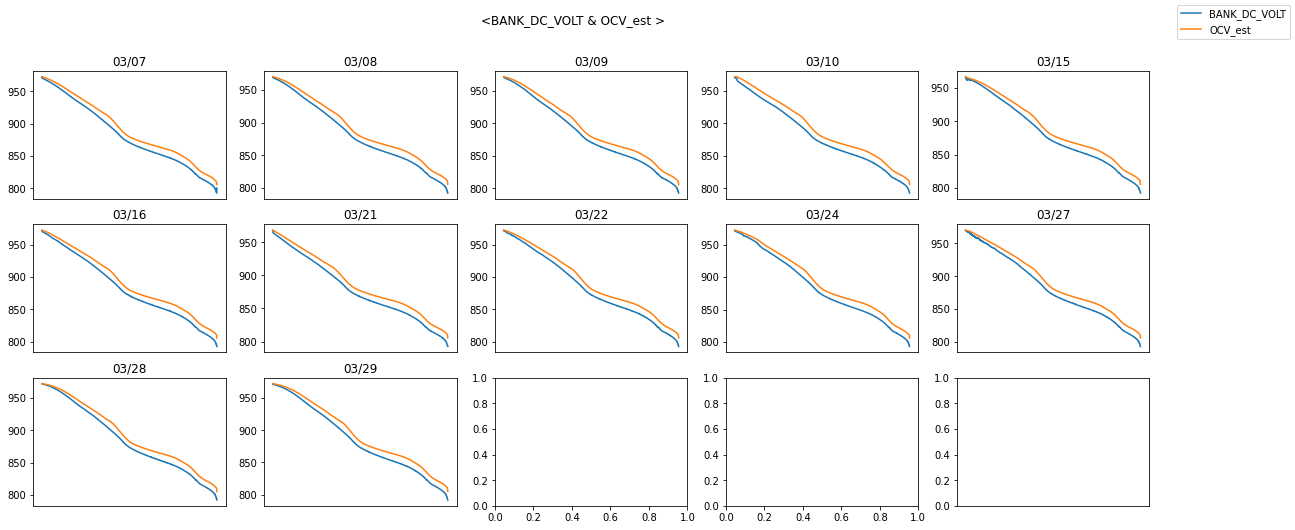

In [5]:
Together = ['BANK_DC_VOLT','OCV_est']

#define subplots
row , col = 3 , 5   # row, column
fig, ax = plt.subplots(row, col, figsize=(20,8))
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
Title = ''

for concern in Together:
    Title += concern + ' & '

    #create subplots
    for i in range(row):
        for j in range(col):
            try:
                ax[i,j].plot( Separated_DF1[dates1[i*col + j]].loc[:,concern],label=concern )
                #ax[i,j].legend(loc="upper right")
                ax[i,j].set_title( dates1[i*col + j][:2] + '/' + dates1[i*col + j][2:] )
                ax[i,j].axes.xaxis.set_visible(False) #x축만 없애기
            except:
                continue
                
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines_labels = [lines_labels[0]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)
plt.suptitle('<'+ Title[:-2] +'>')
plt.show()

## 내부 저항 계산

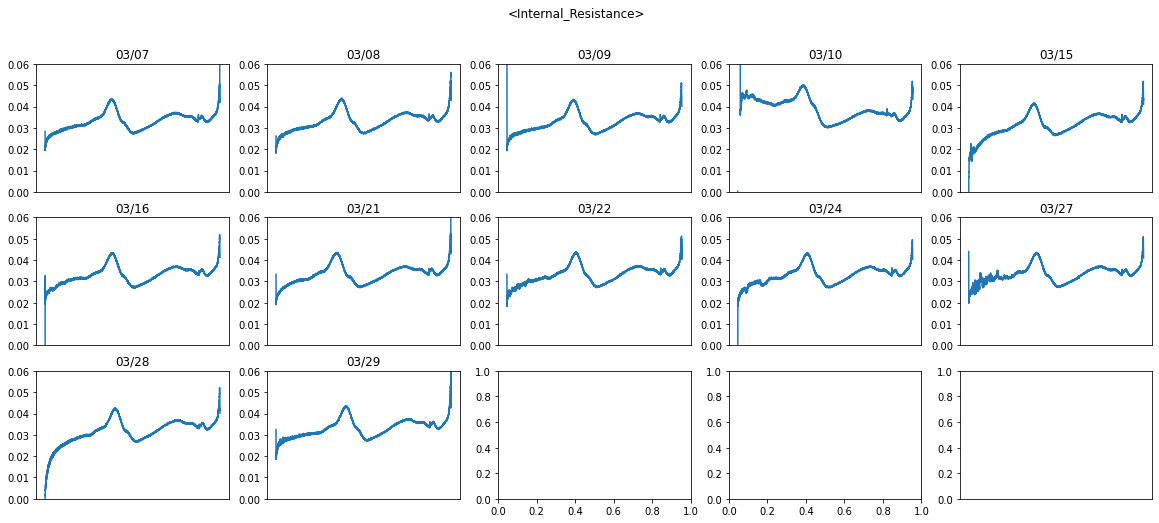

In [6]:
concerns = ['Internal_Resistance']

for concern in concerns:
    
    #define subplots
    row , col = 3 , 5   # row, column
    fig, ax = plt.subplots(row, col, figsize=(20,8))
    plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
    #fig.tight_layout()
    

    #create subplots
    for i in range(row):
        for j in range(col):
            try:
                #plt.xticks(fontsize=16)
                #plt.yticks(fontsize=16)
                ax[i,j].plot( Separated_DF1[dates1[i*col + j]].loc[:,concern] )
                ax[i,j].set_title( dates1[i*col + j][:2] + '/' + dates1[i*col + j][2:] )
                ax[i,j].axes.xaxis.set_visible(False) #x축만 없애기
                
                #if concern == 'BANK_DC_VOLT':
                
                if concern == 'Internal_Resistance' :
                    ax[i,j].set_ylim(0,0.06)

            except:
                continue
         
    plt.suptitle('<'+concern+'>')
    plt.show()